In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)
from datetime import datetime
from IPython.display import Video
from jupyterthemes import jtplot
from IPython.display import HTML
jtplot.style()

In [3]:
train_df=pd.read_csv('training_set.csv')
train_metadata=pd.read_csv('training_set_metadata.csv')

In [4]:
train_df.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [5]:
train_metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [6]:
unix_timestamps=train_df['mjd'].apply(lambda x: (x - 40587)*86400)

train_df_Treadable=train_df.copy(deep=True)
train_df_Treadable['mjd']=unix_timestamps.apply(lambda x: datetime.fromtimestamp(x))
train_df_Treadable=train_df_Treadable.rename(columns={'mjd':'timestamp'})
train_df_Treadable['timestamp']=pd.to_datetime(train_df_Treadable['timestamp'])

In [7]:
train_df_Treadable.head()

,object_id,timestamp,passband,flux,flux_err,detected
0,615,2022-06-20 05:08:58.560,2,-544.810303,3.622952,1
1,615,2022-06-20 05:20:03.840,1,-816.434326,5.553370,1
2,615,2022-06-20 05:31:09.120,3,-471.385529,3.801213,1
3,615,2022-06-20 05:40:48.000,4,-388.984985,11.395031,1
4,615,2022-06-22 04:46:04.800,2,-681.858887,4.041204,1


In [8]:
print("Fecha minima:",train_df_Treadable['timestamp'].min())
print("Fecha maxima:",train_df_Treadable['timestamp'].max())

Fecha minima: 2021-12-31 18:49:23.520000
Fecha maxima: 2024-12-30 02:42:43.200000


In [9]:
ts_lens = train_df.groupby(['object_id','passband']).size()
ts_lens=ts_lens.reset_index().rename(columns={0:'length'})

Text(0.5, 1.0, 'distribución de longitud de series de tiempo')

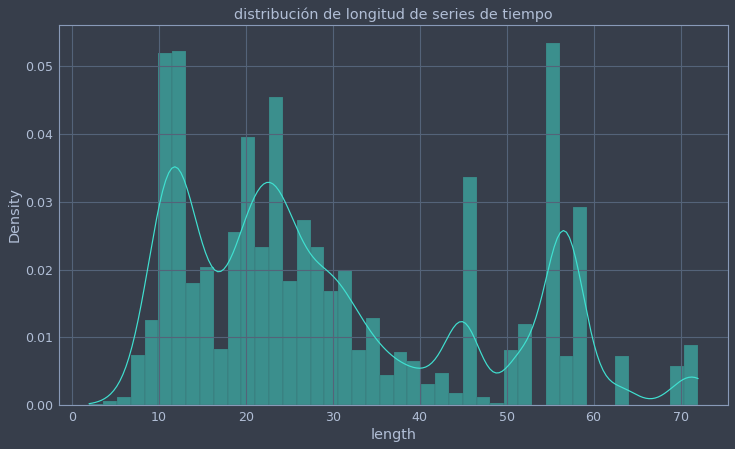

In [10]:
f,ax = plt.subplots(figsize=(12,7))
sns.histplot(x=ts_lens['length'],ax=ax,stat='density',kde=True,color='turquoise')
ax.set_title('distribución de longitud de series de tiempo')

Text(0.5, 1.0, 'Distribucion de observaciones en cada tiempo')

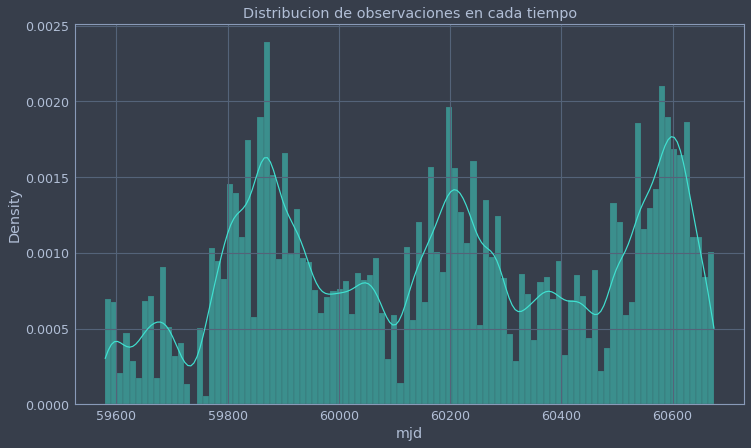

In [11]:
f,ax=plt.subplots(figsize=(12,7))
sns.histplot(train_df['mjd'],ax=ax,bins=100,kde=True,stat='density',color='turquoise')
ax.set_title('Distribucion de observaciones en cada tiempo')

Text(0.5, 1.0, 'Obervaciones en cada tiempo para un objecto particular')

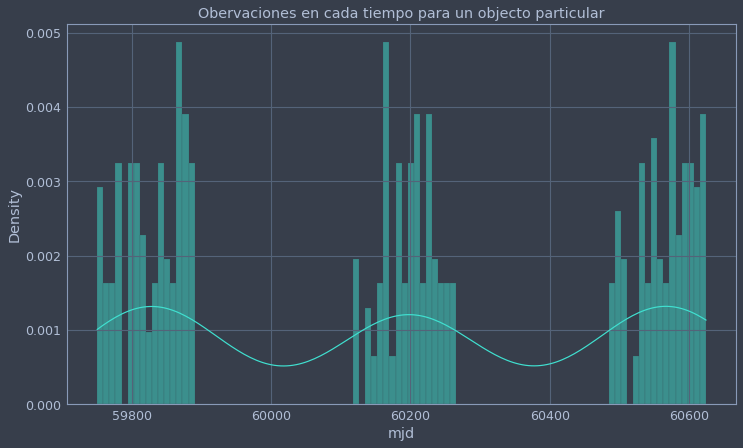

In [12]:
f,ax=plt.subplots(figsize=(12,7))
sns.histplot(train_df[train_df['object_id']==615]['mjd'],ax=ax,bins=100,kde=True,
            stat='density',color='turquoise')
ax.set_title('Obervaciones en cada tiempo para un objecto particular')

Text(0.5, 1.0, 'Distribucion de observaciones en el timepo para una curva y passband particulares')

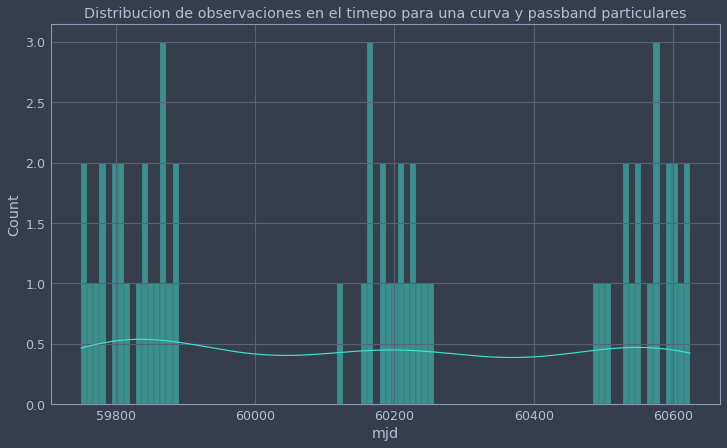

In [13]:
f,ax=plt.subplots(figsize=(12,7))
sns.histplot(train_df[(train_df['object_id'] == 615) 
                          & (train_df['passband'] == 2)]['mjd'], 
             ax=ax, bins=100,kde=True,color='turquoise')
ax.set_title('Distribucion de observaciones en el timepo para una curva y passband particulares')

In [14]:
obj_obs_count = train_df['object_id'].value_counts().reset_index()
obj_obs_count.columns = ['object_id', 'count']

obj_obs_count_w_ddf = pd.merge(
    obj_obs_count, train_metadata[['object_id', 'ddf']], on='object_id')

In [15]:
selected = obj_obs_count_w_ddf.groupby('ddf')['count'].value_counts()
selected.index.names = ['ddf', 'count_val']
selected = selected.reset_index().pivot('count_val', 'ddf',
                                        'count').rename(columns={
                                            0: 'nonddf',
                                            1: 'ddf'
                                        }).fillna(0)

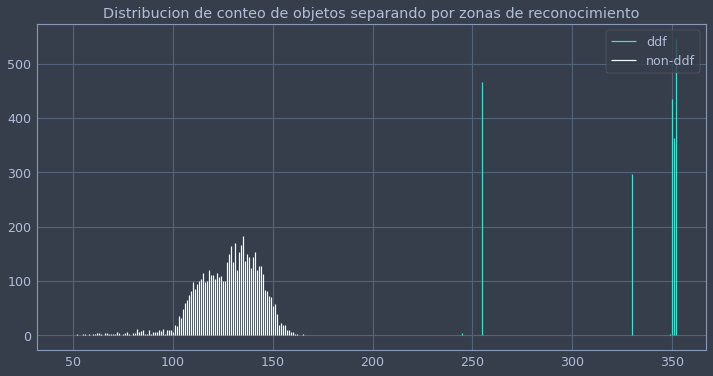

In [16]:
f, ax = plt.subplots(figsize=(12, 6))
ax.vlines(x=selected.index, ymin=0, ymax=selected['ddf'], 
          colors='turquoise', label='ddf')
ax.vlines(x=selected.index, ymin=0, ymax=selected['nonddf'], 
          colors='azure', label='non-ddf')
ax.set_title('Distribucion de conteo de objetos separando por zonas de reconocimiento')
plt.legend()

/home/emmanuel/miniconda3/envs/toughenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
/home/emmanuel/miniconda3/envs/toughenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/emmanuel/miniconda3/envs/toughenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/emmanuel/miniconda3/envs/toughenv/lib/python3.7/site-packages/pandas/plot

<AxesSubplot:xlabel='mjd', ylabel='flux'>

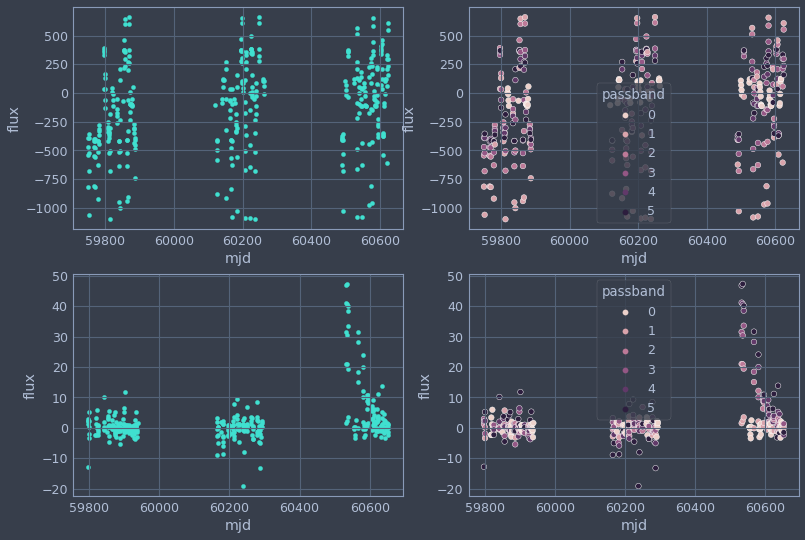

In [17]:
fig,ax=plt.subplots(2,2,figsize=(13,9))
train_df[train_df.object_id==615].plot(y='flux',x='mjd',ax=ax[0,0],kind='scatter',colors='turquoise')
train_df[train_df.object_id==730].plot(y='flux',x='mjd',ax=ax[1,0],kind='scatter',colors='turquoise')
sns.scatterplot(y='flux',x='mjd',hue='passband',ax=ax[1,1],data=train_df[train_df.object_id==730])
sns.scatterplot(y='flux',x='mjd',hue='passband',ax=ax[0,1],data=train_df[train_df.object_id==615])

In [18]:
train_metadata['ddf'].value_counts(normalize=True)*100
indx = train_metadata[train_metadata['ddf']==1]['object_id']

In [19]:
train_df_DDF=train_df[train_df['object_id'].isin(indx)]

In [20]:
groups = train_df_DDF.groupby(['object_id', 'passband'])
def normalise(ts):
    return (ts - ts.mean()) / ts.std()

times = groups.apply(
    lambda block: block['mjd'].values).reset_index().rename(columns={0: 'seq'})

flux = groups.apply(
    lambda block: normalise(block['flux']).values
).reset_index().rename(columns={0: 'seq'})

times_list = times.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
flux_list = flux.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()

In [21]:
def phase_lc(n,freq,ax):
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

    for band in range(6):
        ax.plot(times_list[n][band] * freq % 1,flux_list[n][band],
                'o',c=colors[band],label=colors[band][0])
    ax.set_xlabel('phase')
    ax.set_ylabel('flux')
    ax.set_title('class:{}'.format(train_metadata['target'][n]))

In [22]:
import cesium.featurize as featurize
warnings.simplefilter('ignore', RuntimeWarning)

N=200
cfeats=featurize.featurize_time_series(times=times_list[:N],
                                      values=flux_list[:N],
                                      features_to_use=[
                                          'freq1_freq','freq1_signif','freq1_amplitude1'
                                      ], scheduler=None)

In [23]:
cfeats.head(10)

feature freq1_freq                                                         \
channel          0          1          2          3          4          5   
0         3.081631   3.081649   3.081649   3.081649   3.081634   3.081685   
1         8.039430   1.398236   3.658689   3.004364   5.402107  32.580218   
2         5.340386   9.334225   0.002389   0.002389   0.002389   0.002296   
3         1.000669   0.001921   0.001546   0.001546   0.001546   0.001546   
4         4.059928   0.002426   0.002426   0.002426   0.002426   0.002432   
5         4.088985  21.855067  28.803230  11.332238  12.448273  18.119335   
6         1.003013   1.005547   1.005547   1.005547   1.005543   1.005541   
7        30.024955  24.153142  30.898294  10.558728  32.689310  22.013566   
8         1.044865   0.004020   0.004020   0.004020   0.004020   0.004020   
9         0.084385   1.866189  28.144181   2.113445  30.411096   6.677070   

feature freq1_signif                                                    \
channel            0         1         2         3         4         5   
0           6.158931  5.891056  5.891504  5.889972  5.885745  5.832451   
1           4.112810  3.590038  3.343515  3.673966  3.491158  3.606677   
2           3.357886  3.559865  4.940412  5.072495  4.966424  4.387976   
3           5.393506  5.147491  5.680746  5.737927  5.660473  5.315413   
4           3.201078  5.376487  5.621737  5.680105  5.710187  5.498847   
5           2.239731  3.267481  3.552267  3.419436  3.206431  3.391778   
6           5.832531  5.890717  5.888801  5.883199  5.878317  5.784912   
7           3.405753  3.472156  3.823526  3.707788  3.379471  3.599405   
8           3.246654  3.932223  4.791999  4.869334  4.665816  4.289429   
9           2.685356  3.630987  2.671670  3.317312  3.472867  3.254105   

feature freq1_amplitude1                                                    
channel                0         1         2         3         4         5  
0               1.405734  1.440543  1.430321  1.418762  1.383399  1.371682  
1               0.347302  0.367888  0.316804  0.402775  0.390311  0.614409  
2               0.563503  0.696104  1.797266  2.029370  1.926230  1.575076  
3               1.905711  5.941357  2.616764  2.176704  2.024827  1.869584  
4               0.560084  2.147542  2.696998  3.245473  3.754612  3.196542  
5               0.361460  0.678818  0.759012  0.773288  0.593271  0.777268  
6               8.887962  2.708268  2.782841  2.562339  2.519664  2.590905  
7               0.575298  0.622191  0.763328  0.682097  0.511168  0.564008  
8               1.216318  1.015343  1.150773  1.281276  1.301712  1.187278  
9               0.910490  0.855048  0.653591  0.754504  0.813175  0.873709

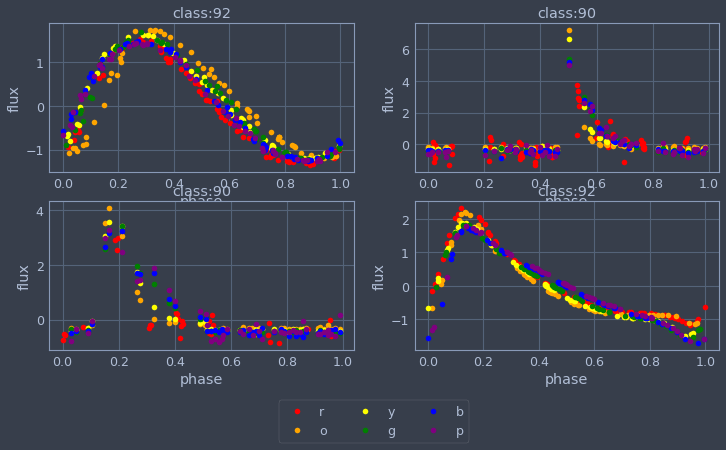

In [24]:
fig,ax=plt.subplots(2,2,figsize=(12,6),sharex=False)
phase_lc(0,3.081631,ax=ax[0,0])
phase_lc(3,0.001921,ax=ax[0,1])
phase_lc(150,1.793083,ax=ax[1,1])
phase_lc(8,0.004020,ax=ax[1,0])
ax[1,1].legend(loc=1, 
             bbox_to_anchor=(0.2, -0.3),fancybox=True, shadow=False, ncol=3)

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data_preprocessed=cfeats.stack('channel').reset_index()
train, test = train_test_split(np.arange(N), random_state=0)

predictions={}
for i in range(2):
    
    forest_params={'max_depth':range(6,12),
              'max_features':range(4,19)}
    
    to_fit=data_preprocessed[data_preprocessed.channel==i]
    model = RandomForestClassifier(n_estimators=128,n_jobs=-1, max_features='auto',
                                         random_state=0, criterion='gini')

    forest_grid=GridSearchCV(model,forest_params,cv=5,n_jobs=-1,verbose=True)
    forest_grid.fit(to_fit.iloc[train],train_metadata['target'][train])
    predictions[i] = forest_grid.predict(to_fit)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/home/emmanuel/miniconda3/envs/toughenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   32.4s finished


Fitting 5 folds for each of 90 candidates, totalling 450 fits


/home/emmanuel/miniconda3/envs/toughenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   31.2s finished


In [26]:
predictions=pd.DataFrame(predictions)

In [27]:
pb=1
print("Built-in cesium features: training accuracy={:.2%}, test accuracy={:.2%}".format(
          accuracy_score(predictions.iloc[train,pb], train_metadata['target'][train]),
          accuracy_score(predictions.iloc[test,pb], train_metadata["target"][test])))

Built-in cesium features: training accuracy=83.33%, test accuracy=52.00%


In [28]:
from sklearn.metrics import confusion_matrix

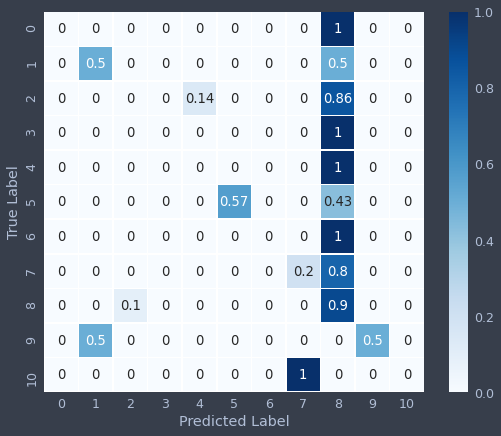

In [29]:
cm = confusion_matrix(train_metadata["target"][test], predictions.iloc[test,pb])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
annot = np.around(cm, 2)

fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cm,cmap='Blues', annot=annot, lw=0.5)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_aspect('equal')